# import libray

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

Get MNIST Data
Split data to (train images, train labels) and (test images, test labels)

In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

There are total 60000 Train images and Train labels.
Shape of single images is 28 x 28 (pixel)

In [3]:
print('Shape of Train images :', train_images.shape)
print('Shape of Train labels : ', train_labels.shape)
print('\nShape of Test images : ', test_images.shape)
print('Shape of Test labels : ', test_labels.shape)

Shape of Train images : (60000, 28, 28)
Shape of Train labels :  (60000,)

Shape of Test images :  (10000, 28, 28)
Shape of Test labels :  (10000,)


Plot first train image(RGB)
when value is close to 0: dark
when value is clost to 255: white

In [4]:
print(train_images[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

Plot First 10 Train images and Corresponding labels

First 10 Train images in MNIST dataset



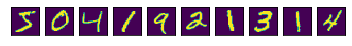


Train labels match with Train label sequentialy
 [5 0 4 1 9 2 1 3 1 4]


In [5]:
print('First 10 Train images in MNIST dataset\n')
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
plt.show()
print('\nTrain labels match with Train label sequentialy\n', train_labels[:10])

# Important
Change data shape(60000 x 28 x 28) to (60000 x 28 x 28 x 1)

In [6]:
train_images = tf.reshape(train_images, [-1, 28, 28, 1])
test_images = tf.reshape(test_images, [-1, 28, 28, 1])

# Select one convolution model below
There are 3 example models.

3, 5, 7 layer each
MODEL 1 : 3 Layers with 1 Convolution layer
MODEL 2 : 5 Layers with 2 Convolution layer
MODEL 3 : 7 Layers with 4 Convolution layer

In [7]:
def select_model(model_number):
    if model_number == 1:
        model = keras.models.Sequential([
            keras.layers.Conv2D(32, (3,3), activation='relu', input_shape = (28, 28, 1)), #layer 1
            keras.layers.MaxPool2D((2,2)), # layer 2
            keras.layers.Flatten(),        
            keras.layers.Dense(10, activation = 'softmax') # layer 3
        ])
    if model_number == 2:
        model = keras.models.Sequential([
            keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape =(28,28,1)), # layer 1
            keras.layers.MaxPool2D((2,2)), # layer 2
            keras.layers.Conv2D(64, (3,3), activation = 'relu'), # layer 3
            keras.layers.MaxPool2D((2,2)), # layer 4
            keras.layers.Flatten(),
            keras.layers.Dense(10, activation = 'softmax') # layer 5
        ])
    if model_number == 3:
        model = keras.models.Sequential([
            keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape =(28,28,1)),# layer 1
            keras.layers.MaxPool2D((2,2)), # layer 2
            keras.layers.Conv2D(64, (3,3), activation = 'relu'), # layer 3
            keras.layers.Conv2D(64, (3,3), activation = 'relu'), # layer 4
            keras.layers.MaxPool2D((2,2)), # layer 5
            keras.layers.Conv2D(128, (3,3), activation='relu'), # layer 6
            keras.layers.Flatten(),
            keras.layers.Dense(10, activation = 'softmax') # layer 7
        ])
    return model

## Model 3 : 7 Layer with 4 Convolution layer

In [10]:
model = select_model(3)

See information of model using model.summary()
summary() is built in function

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

# Componens in training step
Optimizer, Loss function, accuracy metrics

In [12]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# Training Step
Traing for 5 epochs.

In [13]:
model.fit(train_images, train_labels, epochs = 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 127s 2ms/sample - loss: 0.1842 - accuracy: 0.9535
Epoch 2/5
60000/60000 [==============================] - 108s 2ms/sample - loss: 0.0594 - accuracy: 0.9819
Epoch 3/5
60000/60000 [==============================] - 113s 2ms/sample - loss: 0.0447 - accuracy: 0.9865 - loss: 0.0447 - accuracy: 0.98
Epoch 4/5
60000/60000 [==============================] - 112s 2ms/sample - loss: 0.0380 - accuracy: 0.9886
Epoch 5/5
60000/60000 [==============================] - 116s 2ms/sample - loss: 0.0338 - accuracy: 0.9899


## Test Step
# Perform Test with Test data

In [15]:
test_loss, accuracy = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest loss : ', test_loss)
print('Test accuray : ', accuracy)

10000/1 - 4s - loss: 0.0274 - accuracy: 0.9846

Test loss :  0.053700315098174904
Test accuray :  0.9846


# Before prediction, change test image's type to float 32

In [16]:
test_images = tf.cast(test_images, tf.float32)
pred = model.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]

In [17]:
print('Prediction : ', pred.shape)
print('Test labels : ', test_labels.shape)

Prediction :  (10000, 10)
Test labels :  (10000,)


# Functions for plot images, probability

In [35]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img=predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(Number[predicted_label],
                                        100*np.max(predictions_array),
                                        Number[true_label]),
               color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    plt.xticks(Number)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [36]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

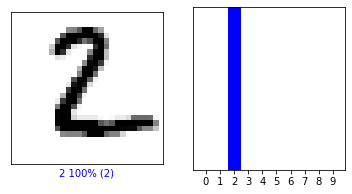

In [37]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred, test_labels)
plt.show()

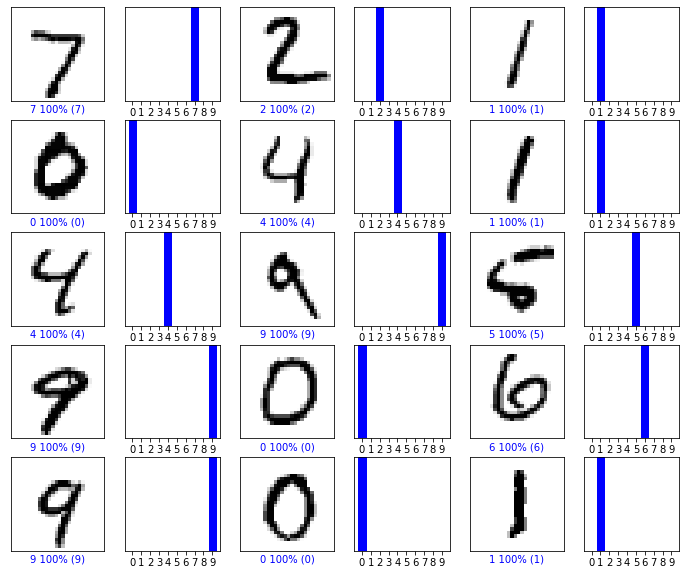

In [39]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, pred, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, pred, test_labels)
plt.show()

## Plot images and probability that model predicted wrong

In [40]:
def error_mnist(prediction_array, true_label):
    error_index = []
    
    for i in range(true_label.shape[0]):
        if np.argmax(prediction_array[i]) != true_label[i]:
            error_index.append(i)
    return error_index

# change num_cols, num_rows if you want to see more result.  
def plot_error(index, prediction_array, true_label):
    num_cols = 5
    num_rows = 5
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))

    assert len(index) < num_cols * num_rows
    for i in range(len(index)):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        idx = index[i]
        plt.imshow(test_images[idx])
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plt.bar(range(10), prediction_array[idx])
        plt.xticks(Number)

# Find index of wrong prediction
## Plot first 10 wrong predicted images and probability

In [41]:
index = error_mnist(pred, test_labels)
index_slice = index[:10]
print(index[:10])

[149, 259, 290, 326, 445, 450, 582, 583, 659, 723]


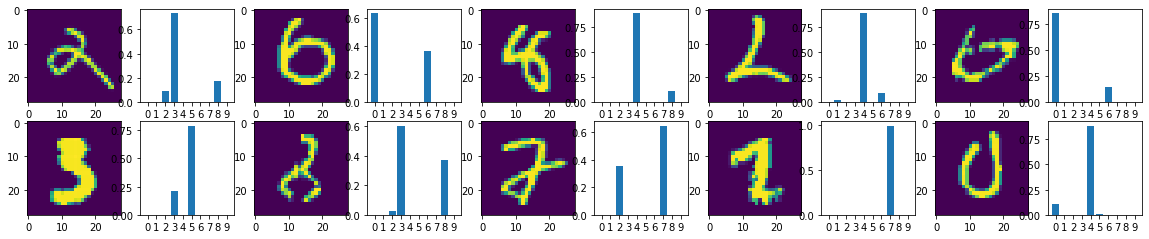

In [72]:
plot_error(index_slice, pred, test_labels)

## Model 2 : 5 Layer with 2 Convolution layer

In [58]:
model2 = select_model(2)

See information of model using model.summary()
summary() is built in function

In [59]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
__________________________________________________

# Componens in training step
Optimizer, Loss function, accuracy metrics

In [60]:
model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# Training Step
Traing for 5 epochs.

In [61]:
model2.fit(train_images, train_labels, epochs = 3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 59s 982us/sample - loss: 0.3581 - accuracy: 0.9452
Epoch 2/3
60000/60000 [==============================] - 58s 967us/sample - loss: 0.0703 - accuracy: 0.9786- loss: 0.0695 - accu
Epoch 3/3
60000/60000 [==============================] - 58s 960us/sample - loss: 0.0551 - accuracy: 0.9838


## Test Step
# Perform Test with Test data

In [62]:
test_loss, accuracy = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest loss : ', test_loss)
print('Test accuray : ', accuracy)

10000/1 - 4s - loss: 0.0274 - accuracy: 0.9846

Test loss :  0.053700315098174904
Test accuray :  0.9846


# Before prediction, change test image's type to float 32

In [63]:
test_images = tf.cast(test_images, tf.float32)
pred = model.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]

In [64]:
print('Prediction : ', pred.shape)
print('Test labels : ', test_labels.shape)

Prediction :  (10000, 10)
Test labels :  (10000,)


# Functions for plot images, probability

In [65]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img=predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(Number[predicted_label],
                                        100*np.max(predictions_array),
                                        Number[true_label]),
               color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    plt.xticks(Number)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [66]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

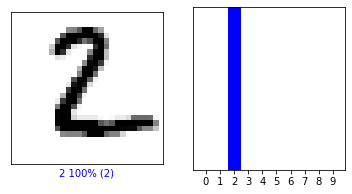

In [67]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred, test_labels)
plt.show()

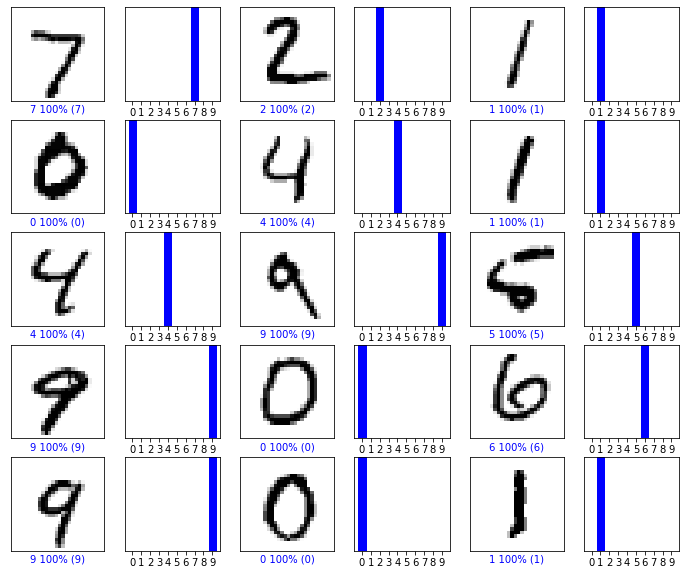

In [68]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, pred, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, pred, test_labels)
plt.show()

## Plot images and probability that model predicted wrong

In [69]:
def error_mnist(prediction_array, true_label):
    error_index = []
    
    for i in range(true_label.shape[0]):
        if np.argmax(prediction_array[i]) != true_label[i]:
            error_index.append(i)
    return error_index

# change num_cols, num_rows if you want to see more result.  
def plot_error(index, prediction_array, true_label):
    num_cols = 5
    num_rows = 5
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))

    assert len(index) < num_cols * num_rows
    for i in range(len(index)):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        idx = index[i]
        plt.imshow(test_images[idx])
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plt.bar(range(10), prediction_array[idx])
        plt.xticks(Number)

# Find index of wrong prediction
## Plot first 10 wrong predicted images and probability

In [70]:
index = error_mnist(pred, test_labels)
index_slice = index[:10]
print(index[:10])

[149, 259, 290, 326, 445, 450, 582, 583, 659, 723]


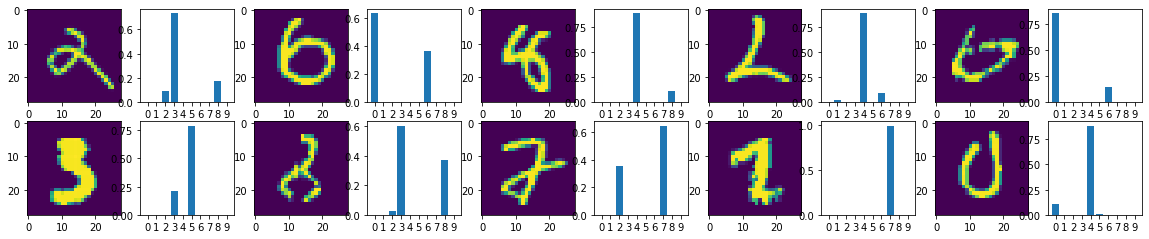

In [72]:
plot_error(index_slice, pred, test_labels)

## Model 2 : 5 Layer with 2 Convolution layer

In [8]:
model2 = select_model(2)

See information of model using model.summary()
summary() is built in function

In [9]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
____________________________________________________

# Componens in training step
Optimizer, Loss function, accuracy metrics

In [10]:
model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# Training Step
Traing for 5 epochs.

In [11]:
model2.fit(train_images, train_labels, epochs = 3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 64s 1ms/sample - loss: 0.4334 - accuracy: 0.9433
Epoch 2/3
60000/60000 [==============================] - 64s 1ms/sample - loss: 0.0738 - accuracy: 0.9779
Epoch 3/3
60000/60000 [==============================] - 61s 1ms/sample - loss: 0.0574 - accuracy: 0.9828


## Test Step
# Perform Test with Test data

In [12]:
test_loss, accuracy = model2.evaluate(test_images, test_labels, verbose=2)
print('\nTest loss : ', test_loss)
print('Test accuray : ', accuracy)

10000/1 - 3s - loss: 0.0345 - accuracy: 0.9797

Test loss :  0.06479331389029394
Test accuray :  0.9797


# Before prediction, change test image's type to float 32

In [14]:
test_images = tf.cast(test_images, tf.float32)
pred = model2.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]

In [15]:
print('Prediction : ', pred.shape)
print('Test labels : ', test_labels.shape)

Prediction :  (10000, 10)
Test labels :  (10000,)


# Functions for plot images, probability

In [16]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img=predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(Number[predicted_label],
                                        100*np.max(predictions_array),
                                        Number[true_label]),
               color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    plt.xticks(Number)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [17]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

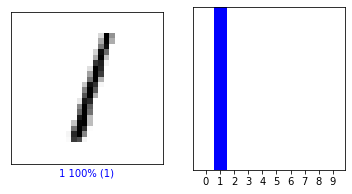

In [20]:
i = 2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred, test_labels)
plt.show()

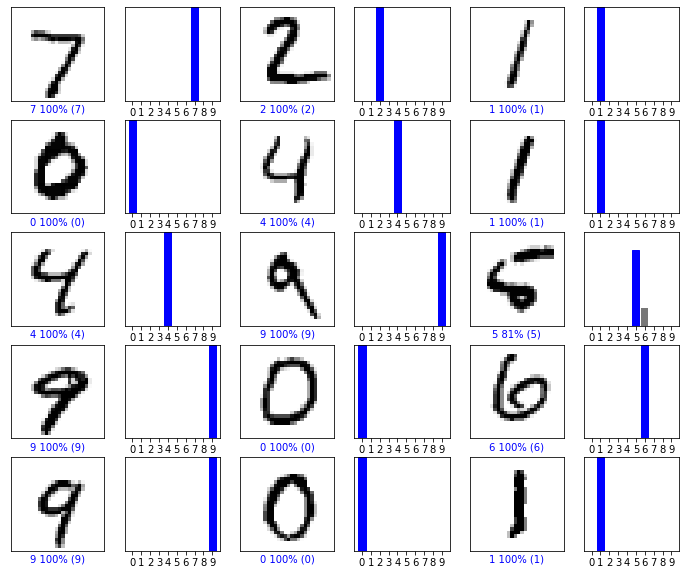

In [21]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, pred, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, pred, test_labels)
plt.show()

## Plot images and probability that model predicted wrong

In [22]:
def error_mnist(prediction_array, true_label):
    error_index = []
    
    for i in range(true_label.shape[0]):
        if np.argmax(prediction_array[i]) != true_label[i]:
            error_index.append(i)
    return error_index

# change num_cols, num_rows if you want to see more result.  
def plot_error(index, prediction_array, true_label):
    num_cols = 5
    num_rows = 5
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))

    assert len(index) < num_cols * num_rows
    for i in range(len(index)):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        idx = index[i]
        plt.imshow(test_images[idx])
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plt.bar(range(10), prediction_array[idx])
        plt.xticks(Number)

# Find index of wrong prediction
## Plot first 10 wrong predicted images and probability

In [23]:
index = error_mnist(pred, test_labels)
index_slice = index[:10]
print(index[:10])

[241, 247, 257, 259, 264, 266, 290, 320, 321, 359]


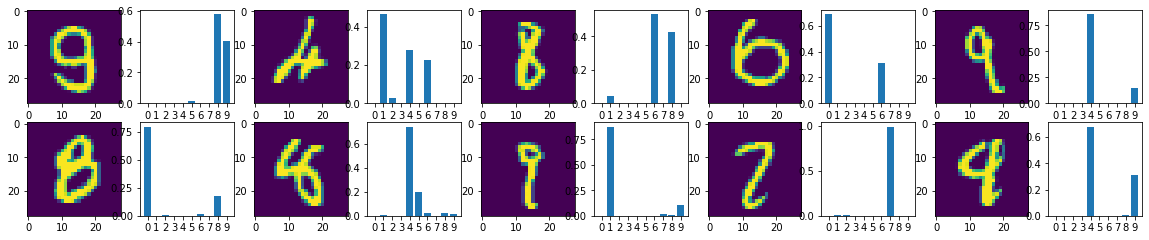

In [24]:
plot_error(index_slice, pred, test_labels)

## Model 1 : 3 Layer with 1 Convolution layer

In [81]:
model1 = select_model(1)

See information of model using model.summary()
summary() is built in function

In [82]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


# Componens in training step
Optimizer, Loss function, accuracy metrics

In [83]:
model1.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# Training Step
Traing for 5 epochs.

In [84]:
model1.fit(train_images, train_labels, epochs = 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 34s 565us/sample - loss: 0.5437 - accuracy: 0.9418- loss: 0.5691 - 
Epoch 2/5
60000/60000 [==============================] - 33s 550us/sample - loss: 0.0821 - accuracy: 0.9750
Epoch 3/5
60000/60000 [==============================] - 34s 564us/sample - loss: 0.0674 - accuracy: 0.9787
Epoch 4/5
60000/60000 [==============================] - 33s 550us/sample - loss: 0.0603 - accuracy: 0.9820- loss: 0.0599 - accura
Epoch 5/5
60000/60000 [==============================] - 37s 616us/sample - loss: 0.0535 - accuracy: 0.9839- loss: 0.0531 - ac


## Test Step
# Perform Test with Test data

In [85]:
test_loss, accuracy = model1.evaluate(test_images, test_labels, verbose=2)
print('\nTest loss : ', test_loss)
print('Test accuray : ', accuracy)

10000/1 - 2s - loss: 0.0697 - accuracy: 0.9725

Test loss :  0.1263087729310093
Test accuray :  0.9725


# Before prediction, change test image's type to float 32

In [86]:
test_images = tf.cast(test_images, tf.float32)
pred = model1.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]

In [87]:
print('Prediction : ', pred.shape)
print('Test labels : ', test_labels.shape)

Prediction :  (10000, 10)
Test labels :  (10000,)


# Functions for plot images, probability

In [88]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img=predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(Number[predicted_label],
                                        100*np.max(predictions_array),
                                        Number[true_label]),
               color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    plt.xticks(Number)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [89]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

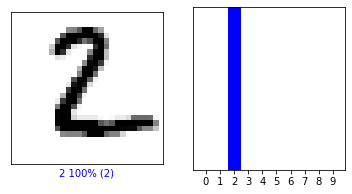

In [90]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred, test_labels)
plt.show()

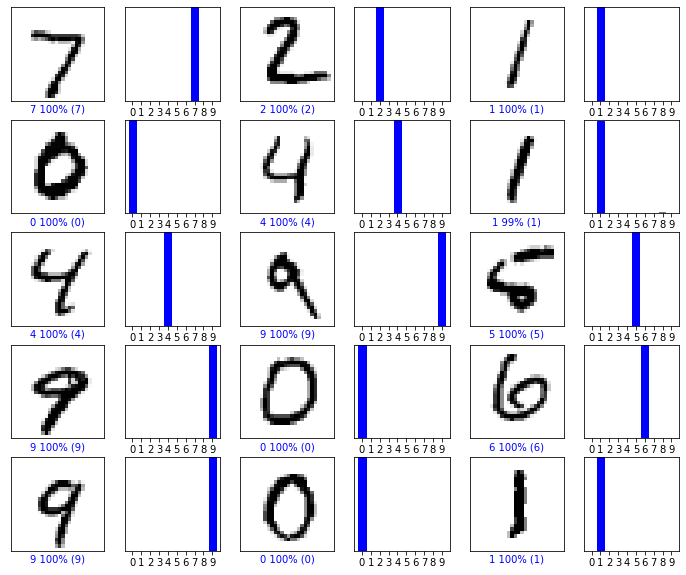

In [91]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, pred, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, pred, test_labels)
plt.show()

## Plot images and probability that model predicted wrong

In [92]:
def error_mnist(prediction_array, true_label):
    error_index = []
    
    for i in range(true_label.shape[0]):
        if np.argmax(prediction_array[i]) != true_label[i]:
            error_index.append(i)
    return error_index

# change num_cols, num_rows if you want to see more result.  
def plot_error(index, prediction_array, true_label):
    num_cols = 5
    num_rows = 5
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))

    assert len(index) < num_cols * num_rows
    for i in range(len(index)):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        idx = index[i]
        plt.imshow(test_images[idx])
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plt.bar(range(10), prediction_array[idx])
        plt.xticks(Number)

# Find index of wrong prediction
## Plot first 10 wrong predicted images and probability

In [93]:
index = error_mnist(pred, test_labels)
index_slice = index[:10]
print(index[:10])

[18, 217, 243, 282, 290, 318, 321, 340, 431, 445]


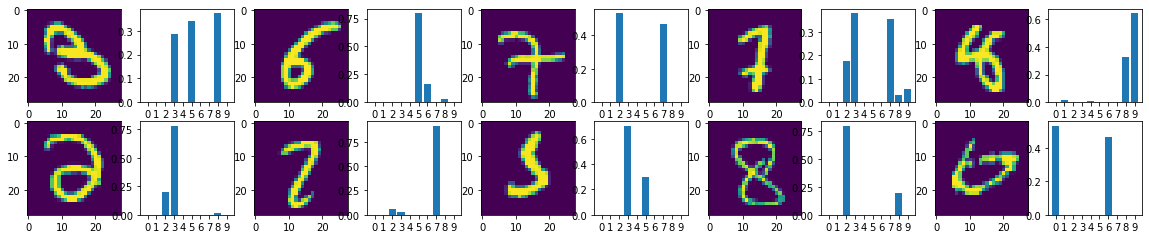

In [94]:
plot_error(index_slice, pred, test_labels)